<a href="https://colab.research.google.com/github/Rohit2209Raj/ML-Basic-Projects/blob/main/ford_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
adhurimquku_ford_car_price_prediction_path = kagglehub.dataset_download('adhurimquku/ford-car-price-prediction')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

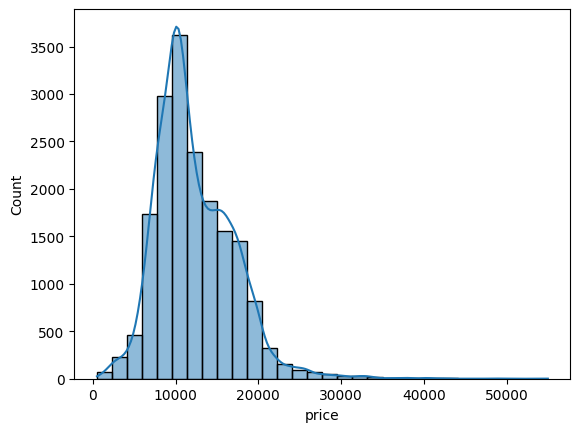

In [ ]:
sns.histplot(df['price'],bins=30,kde=True)

<Axes: >

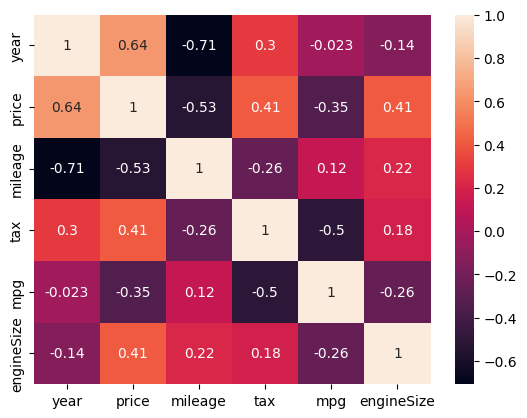

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

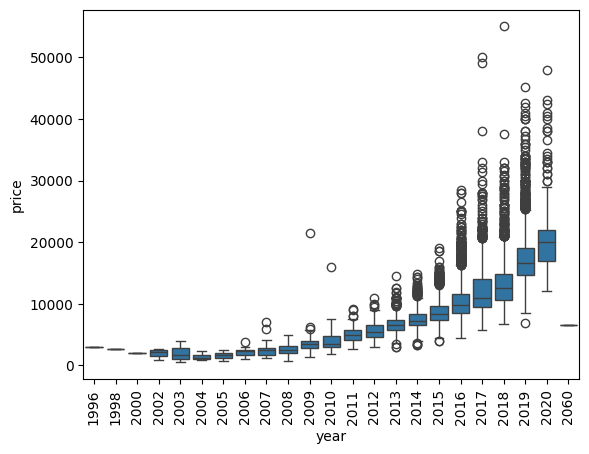

In [ ]:
sns.boxplot(x=df['year'],y=df['price'])
plt.xticks(rotation=90)

<Axes: xlabel='mileage', ylabel='price'>

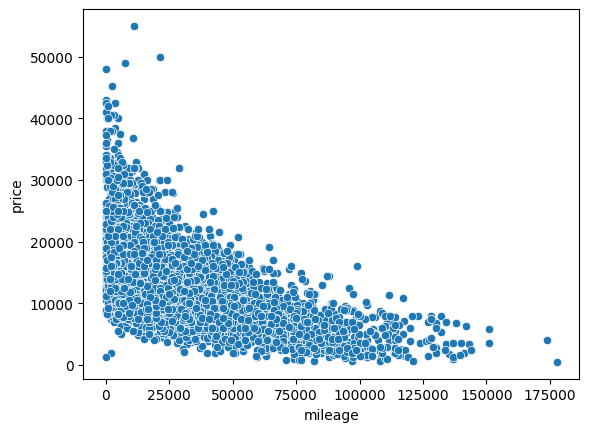

In [ ]:
sns.scatterplot(x=df['mileage'],y=df['price'])

<Axes: xlabel='engineSize', ylabel='price'>

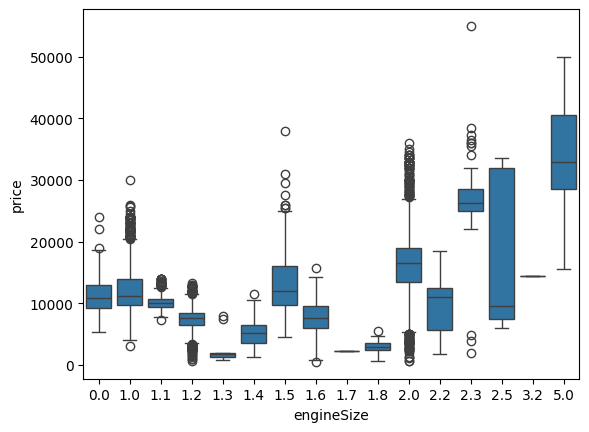

In [ ]:
sns.boxplot(data = df, x = 'engineSize', y = 'price')


In [ ]:
df = df[df['engineSize'] != 0]

<Axes: xlabel='transmission', ylabel='price'>

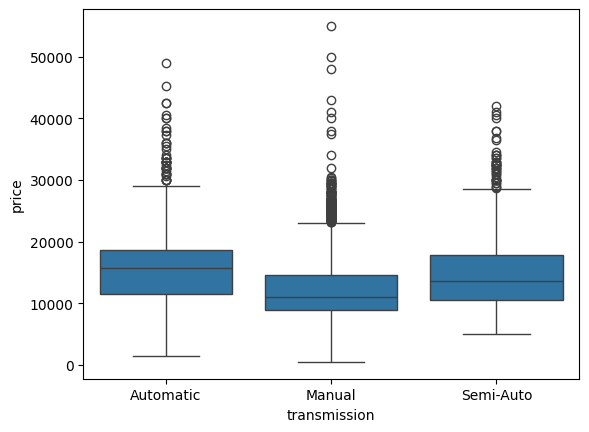

In [ ]:
sns.boxplot(data = df, x = 'transmission',y = 'price')

<Axes: xlabel='fuelType', ylabel='price'>

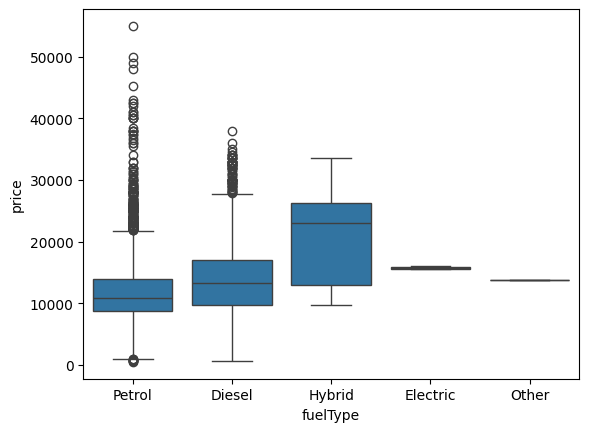

In [ ]:
sns.boxplot(data = df,x = 'fuelType', y = 'price' )

In [ ]:
df_one_encoded=pd.get_dummies(df,columns=['model','transmission','fuelType'],drop_first=True)

In [ ]:
df_one_encoded=df_one_encoded.astype(int)
df_one_encoded

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,7499,40700,30,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,9999,7010,20,67,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,8299,5007,145,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = ['model', 'transmission', 'fuelType']

X_label = df.copy()
encoders = {}

for col in columns:
    encoders[col] = LabelEncoder()
    X_label[col] = encoders[col].fit_transform(X_label[col].astype(str))

In [ ]:
X_label

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
df_one_encoded[numerical_cols] = scaler.fit_transform(df_one_encoded[numerical_cols])

In [ ]:
df_one_encoded

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065712,12000,-0.381463,0.591117,-0.042417,-0.459926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.553175,14000,-0.733745,0.591117,-0.042417,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065712,13000,-0.560557,0.591117,-0.042417,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040637,17500,-0.663042,0.510491,-1.721196,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1.040637,16500,-1.124022,0.510491,-0.931182,-0.459926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065712,8999,-0.342646,0.591117,-1.029934,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.396677,7499,0.889646,-1.343904,-0.042417,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.909214,9999,-0.840184,-1.505156,0.945100,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.553175,8299,-0.943029,0.510491,-0.042417,-0.459926,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_label[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(X_label[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])
X_label

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460770,0.065712,12000,-2.668852,-0.381463,0.689716,0.591117,-0.020721,-0.830739
1,-0.211624,0.553175,14000,0.040838,-0.733745,0.689716,0.591117,-0.020721,-0.830739
2,-0.211624,0.065712,13000,0.040838,-0.560557,0.689716,0.591117,-0.020721,-0.830739
3,-0.460770,1.040637,17500,0.040838,-0.663042,0.689716,0.510491,-1.738886,0.340462
4,-0.460770,1.040637,16500,-2.668852,-1.124022,0.689716,0.510491,-0.909427,-0.830739
...,...,...,...,...,...,...,...,...,...
17961,-1.706497,0.065712,8999,0.040838,-0.342646,0.689716,0.591117,-1.067420,0.106222
17962,-1.706497,-1.396677,7499,0.040838,0.889646,0.689716,-1.343904,-0.020721,-0.830739
17963,-0.211624,-0.909214,9999,0.040838,-0.840184,-1.452029,-1.505156,0.927232,0.574703
17964,1.034103,0.553175,8299,0.040838,-0.943029,0.689716,0.510491,-0.020721,-0.362258


In [ ]:
df_one_encoded=df_one_encoded.drop(columns=['price'])
X_label=X_label.drop(columns=['price'])
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_one_encoded, y, test_size=0.33, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.846433204774438

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.8455447802317003


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y, test_size=0.33, random_state=42)
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.7423393032496145

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.7419901103690447
